In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df= pd.read_excel('Company_Data2015-1.xlsx')

In [3]:
d_dict = pd.read_excel('Data_Dictionary.xlsx')

### Data Pre_Processing

In [4]:
d_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
...,...,...,...,...
62,64,Debtors Velocity (Days),Average days required for receiving the payments,Debtors_Vel_Days
63,65,Creditors Velocity (Days),Average number of days company takes to pay su...,Creditors_Vel_Days
64,66,Inventory Velocity (Days),Average number of days the company needs to tu...,Inventory_Vel_Days
65,67,Value of Output/Total Assets,Ratio of Value of Output (market value) to Tot...,Value_of_Output_to_Total_Assets


In [5]:
df.head(10)

,Co_Code,Co_Name,Networth Next Year,Equity Paid Up,Networth,Capital Employed,Total Debt,Gross Block,Net Working Capital,Current Assets,...,PBIDTM (%)[Latest],PBITM (%)[Latest],PBDTM (%)[Latest],CPM (%)[Latest],APATM (%)[Latest],Debtors Velocity (Days),Creditors Velocity (Days),Inventory Velocity (Days),Value of Output/Total Assets,Value of Output/Gross Block
0,16974,Hind.Cables,-8021.60,419.36,-7027.48,-1007.24,5936.03,474.30,-1076.34,40.50,...,0.00,0.00,0.00,0.00,0.00,0,0,45.0,0.00,0.00
1,21214,Tata Tele. Mah.,-3986.19,1954.93,-2968.08,4458.20,7410.18,9070.86,-1098.88,486.86,...,-10.30,-39.74,-57.74,-57.74,-87.18,29,101,2.0,0.31,0.24
2,14852,ABG Shipyard,-3192.58,53.84,506.86,7714.68,6944.54,1281.54,4496.25,9097.64,...,-5279.14,-5516.98,-7780.25,-7723.67,-7961.51,97,558,0.0,-0.03,-0.26
3,2439,GTL,-3054.51,157.30,-623.49,2353.88,2326.05,1033.69,-2612.42,1034.12,...,-3.33,-7.21,-48.13,-47.70,-51.58,93,63,2.0,0.24,1.90
4,23505,Bharati Defence,-2967.36,50.30,-1070.83,4675.33,5740.90,1084.20,1836.23,4685.81,...,-295.55,-400.55,-845.88,379.79,274.79,3887,346,0.0,0.01,0.05
5,2484,Usha Ispat,-2519.40,179.35,-2519.39,-1824.75,694.64,0.02,-1843.74,0.00,...,0.00,0.00,0.00,0.00,0.00,0,0,0.0,0.00,0.00
6,23633,Hanung Toys,-2125.05,30.82,-1031.57,1536.08,2567.65,949.98,804.82,834.86,...,-395.87,-987.73,-396.67,-672.36,-1264.22,456,12,392.0,0.00,-0.01
7,3226,K S Oils,-2100.56,45.92,-1945.45,979.13,2664.04,920.67,263.95,705.76,...,-447.24,-596.97,-456.40,-461.06,-610.80,828,622,799.0,-0.02,-0.03
8,1541,Quadrant Tele.,-1695.75,61.23,-1560.94,-613.79,597.82,1700.27,-1121.96,117.67,...,1.90,-20.43,-3.58,-3.58,-25.91,34,145,2.0,0.92,0.31
9,2334,ITI,-1677.18,288.00,-1947.85,86.35,1220.83,1329.82,-390.53,2536.78,...,19.23,18.18,9.76,9.76,8.71,1112,913,62.0,0.54,1.16


In [6]:
df.columns = df.columns.str.replace('(%)', 'perc').str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.replace(' ','_').str.replace('/','_').str.replace('-','_').str.replace('Production','Prod').str.replace('Revenue','Rev').str.replace('earnings','earn')

In [7]:
df.rename(columns = {'Gross_Block_':'Gross_Block', 'Net_Working_Capital_':'Net_Working_Capital','Current_Assets_':'Current_Assets','Current_Liabilities_and_Provisions_':'Current_Liabilities_and_Provisions','Total_Assets_Liabilities_':'Total_Assets_Liabilities','Book_Value_Adj._Unit_Curr':'Book_Value_Adj_Unit_Curr'}, inplace = True)

In [8]:
pd.set_option("max_columns", None)
pd.set_option("max_rows",None)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3586 entries, 0 to 3585
Data columns (total 67 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Co_Code                              3586 non-null   int64  
 1   Co_Name                              3586 non-null   object 
 2   Networth_Next_Year                   3586 non-null   float64
 3   Equity_Paid_Up                       3586 non-null   float64
 4   Networth                             3586 non-null   float64
 5   Capital_Employed                     3586 non-null   float64
 6   Total_Debt                           3586 non-null   float64
 7   Gross_Block                          3586 non-null   float64
 8   Net_Working_Capital                  3586 non-null   float64
 9   Current_Assets                       3586 non-null   float64
 10  Current_Liabilities_and_Provisions   3586 non-null   float64
 11  Total_Assets_Liabilities      

In [10]:
df['Default']=np.where(df['Networth_Next_Year']>=0,0,1)

In [11]:
df.columns

Index(['Co_Code', 'Co_Name', 'Networth_Next_Year', 'Equity_Paid_Up',
       'Networth', 'Capital_Employed', 'Total_Debt', 'Gross_Block',
       'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT',
       'Adjusted_PAT', 'CP', 'Rev_earn_in_forex', 'Rev_expenses_in_forex',
       'Capital_expenses_in_forex', 'Book_Value_Unit_Curr',
       'Book_Value_Adj_Unit_Curr', 'Market_Capitalisation',
       'CEPS_annualised_Unit_Curr', 'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc',
     

In [12]:
df[['Co_Name','Networth_Next_Year','Inventory_Velocity_Days','Default']]

,Co_Name,Networth_Next_Year,Inventory_Velocity_Days,Default
0,Hind.Cables,-8021.60,45.0,1
1,Tata Tele. Mah.,-3986.19,2.0,1
2,ABG Shipyard,-3192.58,0.0,1
3,GTL,-3054.51,2.0,1
4,Bharati Defence,-2967.36,0.0,1
5,Usha Ispat,-2519.40,0.0,1
6,Hanung Toys,-2125.05,392.0,1
7,K S Oils,-2100.56,799.0,1
8,Quadrant Tele.,-1695.75,2.0,1
9,ITI,-1677.18,62.0,1


In [13]:
df=df.drop(['Co_Code', 'Co_Name','Networth_Next_Year'], axis=1)

### EDA

In [14]:
print ('Number of Rows and Columns',df.shape,'\n')

print ('Number of rows with Missing Values', sum(df.isnull().values.any(axis=1)),'\n')

print ('Number of missing values in the Column', df.isnull().sum(),'\n')

print ('Total count of missing Values', df.isnull().sum().sum())

print ( 'Proportion of Missing Values ',df.isnull().sum().sum()/ df.size )

Number of Rows and Columns (3586, 65) 

Number of rows with Missing Values 108 

Number of missing values in the Column Equity_Paid_Up                           0
Networth                                 0
Capital_Employed                         0
Total_Debt                               0
Gross_Block                              0
Net_Working_Capital                      0
Current_Assets                           0
Current_Liabilities_and_Provisions       0
Total_Assets_Liabilities                 0
Gross_Sales                              0
Net_Sales                                0
Other_Income                             0
Value_Of_Output                          0
Cost_of_Prod                             0
Selling_Cost                             0
PBIDT                                    0
PBDT                                     0
PBIT                                     0
PBT                                      0
PAT                                      0
Adjusted_PAT        

In [15]:
missing_values= df.isnull().sum().to_frame()
for index, row in missing_values.iterrows():
    print(index,row[0])

Equity_Paid_Up 0
Networth 0
Capital_Employed 0
Total_Debt 0
Gross_Block 0
Net_Working_Capital 0
Current_Assets 0
Current_Liabilities_and_Provisions 0
Total_Assets_Liabilities 0
Gross_Sales 0
Net_Sales 0
Other_Income 0
Value_Of_Output 0
Cost_of_Prod 0
Selling_Cost 0
PBIDT 0
PBDT 0
PBIT 0
PBT 0
PAT 0
Adjusted_PAT 0
CP 0
Rev_earn_in_forex 0
Rev_expenses_in_forex 0
Capital_expenses_in_forex 0
Book_Value_Unit_Curr 0
Book_Value_Adj_Unit_Curr 4
Market_Capitalisation 0
CEPS_annualised_Unit_Curr 0
Cash_Flow_From_Operating_Activities 0
Cash_Flow_From_Investing_Activities 0
Cash_Flow_From_Financing_Activities 0
ROG_Net_Worth_perc 0
ROG_Capital_Employed_perc 0
ROG_Gross_Block_perc 0
ROG_Gross_Sales_perc 0
ROG_Net_Sales_perc 0
ROG_Cost_of_Prod_perc 0
ROG_Total_Assets_perc 0
ROG_PBIDT_perc 0
ROG_PBDT_perc 0
ROG_PBIT_perc 0
ROG_PBT_perc 0
ROG_PAT_perc 0
ROG_CP_perc 0
ROG_Rev_earn_in_forex_perc 0
ROG_Rev_expenses_in_forex_perc 0
ROG_Market_Capitalisation_perc 0
Current_RatioLatest 1
Fixed_Assets_Ratio

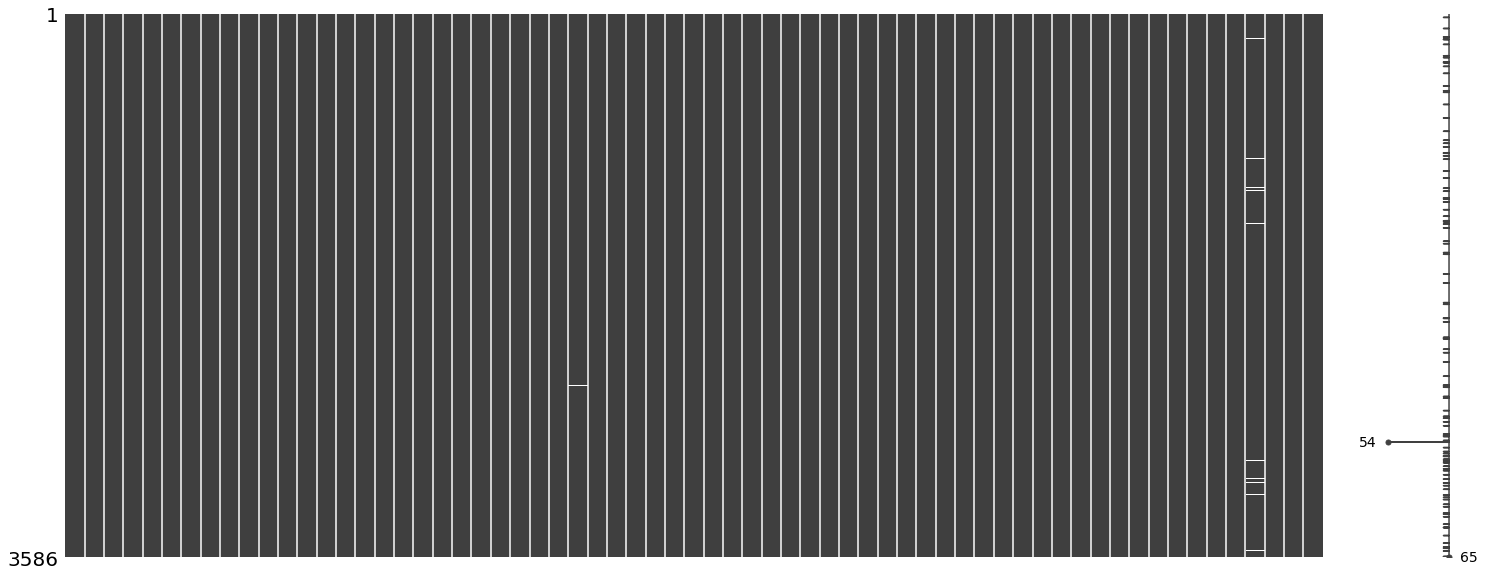

In [16]:
msno.matrix(df)

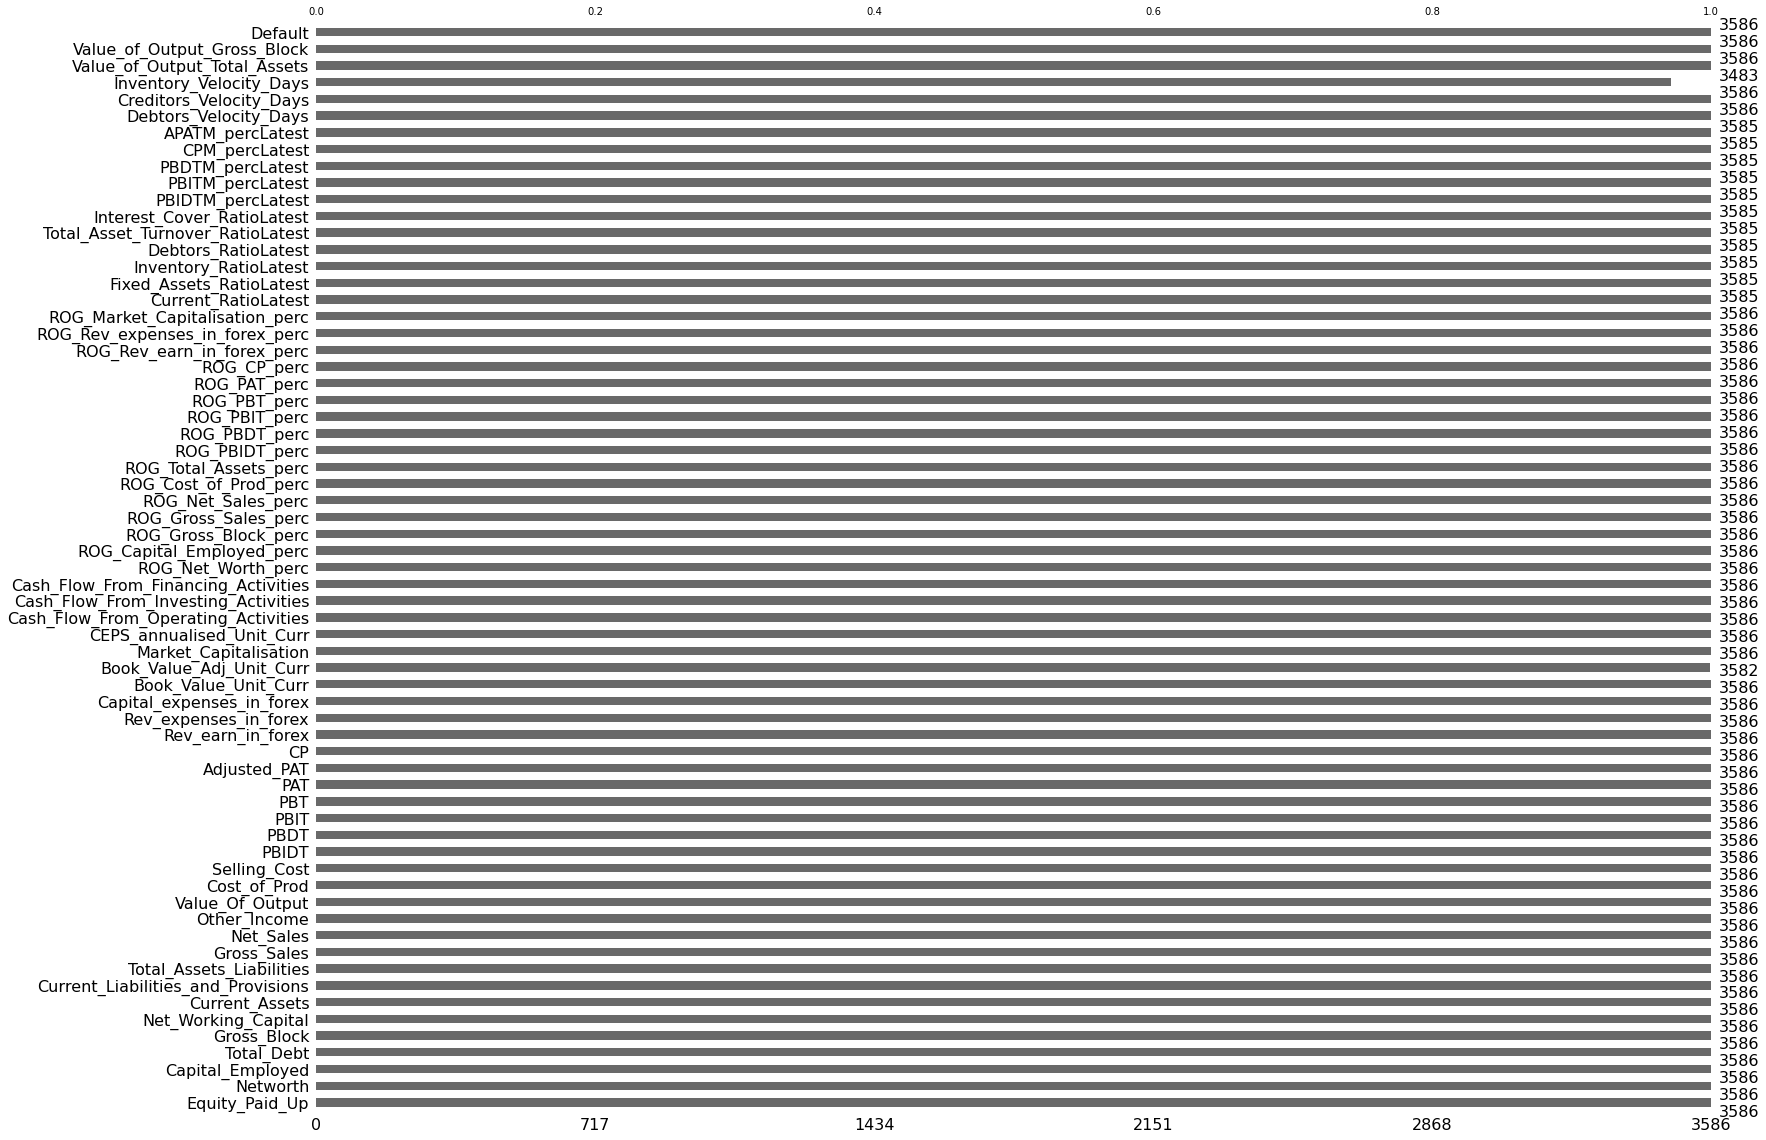

In [17]:
msno.bar(df)

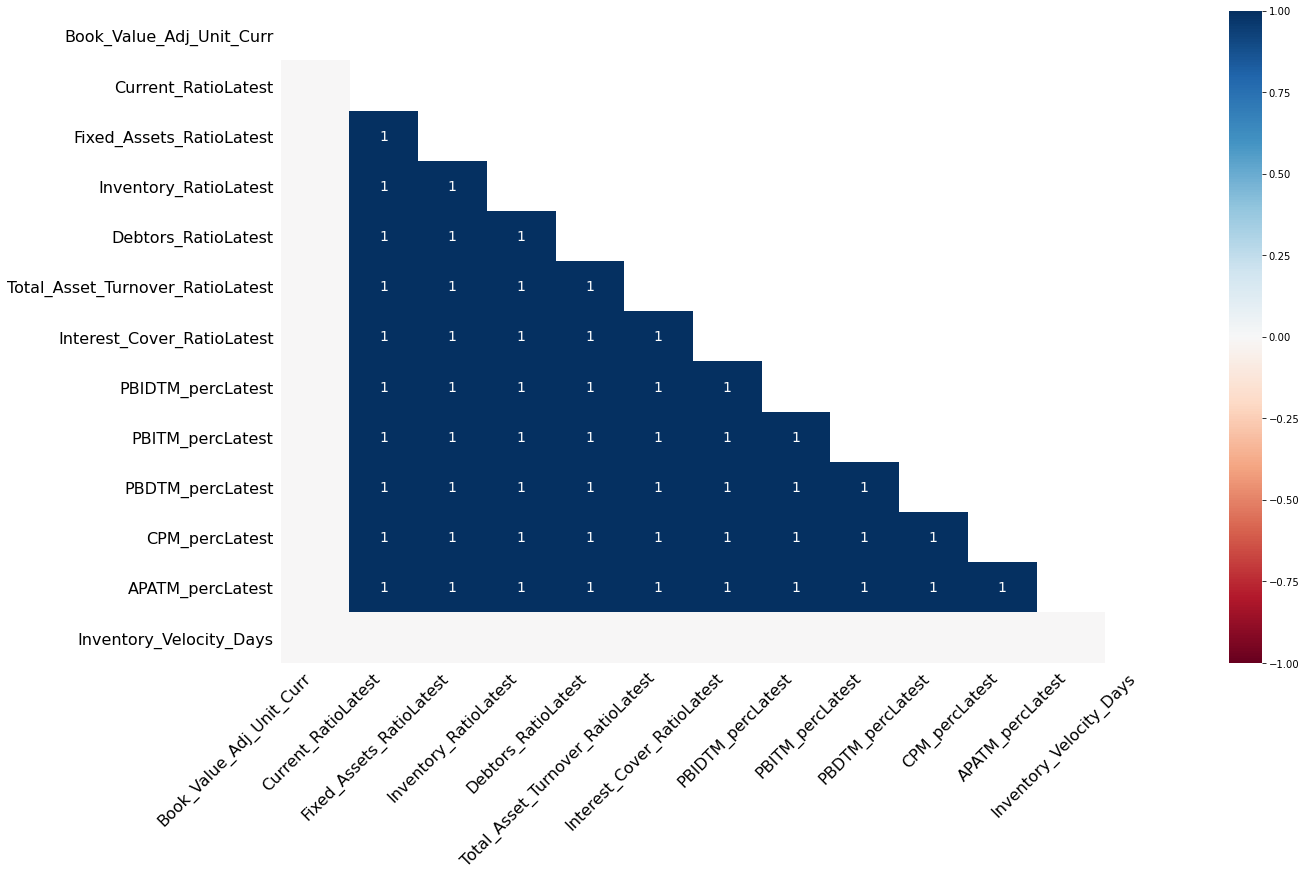

In [18]:
msno.heatmap(df)

In [19]:
df['Default'].value_counts()

0    3199
1     387
Name: Default, dtype: int64

In [20]:
3199/387

8.266149870801033

In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Equity_Paid_Up,3586.0,62.966584,778.761744,0.00,3.7500,8.290,19.5175,42263.46
Networth,3586.0,649.746299,4091.988792,-7027.48,3.8925,18.580,117.2975,81657.35
Capital_Employed,3586.0,2799.611054,26975.135385,-1824.75,7.6025,39.090,226.6050,714001.25
Total_Debt,3586.0,1994.823779,23652.842746,-0.72,0.0300,7.490,72.3500,652823.81
Gross_Block,3586.0,594.178829,4871.547802,-41.19,0.5700,15.870,131.8950,128477.59
Net_Working_Capital,3586.0,410.809665,6301.218546,-13162.42,0.9425,10.145,61.1750,223257.56
Current_Assets,3586.0,1960.349172,22577.570829,-0.91,4.0000,24.540,135.2775,721166.00
Current_Liabilities_and_Provisions,3586.0,391.992078,2675.001631,-0.23,0.7325,9.225,65.6500,83232.98
Total_Assets_Liabilities,3586.0,1778.453751,11437.574690,-4.51,10.5550,52.010,310.5400,254737.22
Gross_Sales,3586.0,1123.738985,10603.703837,-62.59,1.4425,31.210,242.2500,474182.94


In [22]:
df_x =df.drop('Default', axis =1)
df_y = df['Default']

In [23]:
Q1 = df_x.quantile(0.25)
Q3 = df_x.quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

In [24]:
((df_x > UL) | (df_x < LL)).sum()

Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_Liabilities                574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                                      816
Rev_earn_in_forex               

In [25]:
df_x[((df_x > UL) | (df_x < LL))]=np.nan

In [26]:
df_x.isnull().sum()

Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_Liabilities                574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959
Adjusted_PAT                            954
CP                                      816
Rev_earn_in_forex               

In [27]:
((df_x > UL) | (df_x < LL)).sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_Liabilities               0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_expenses_in_forex                  0
Capital_expenses

In [28]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [29]:
df_x.isnull().sum().sum()

41473

In [30]:
df_x.size

229504

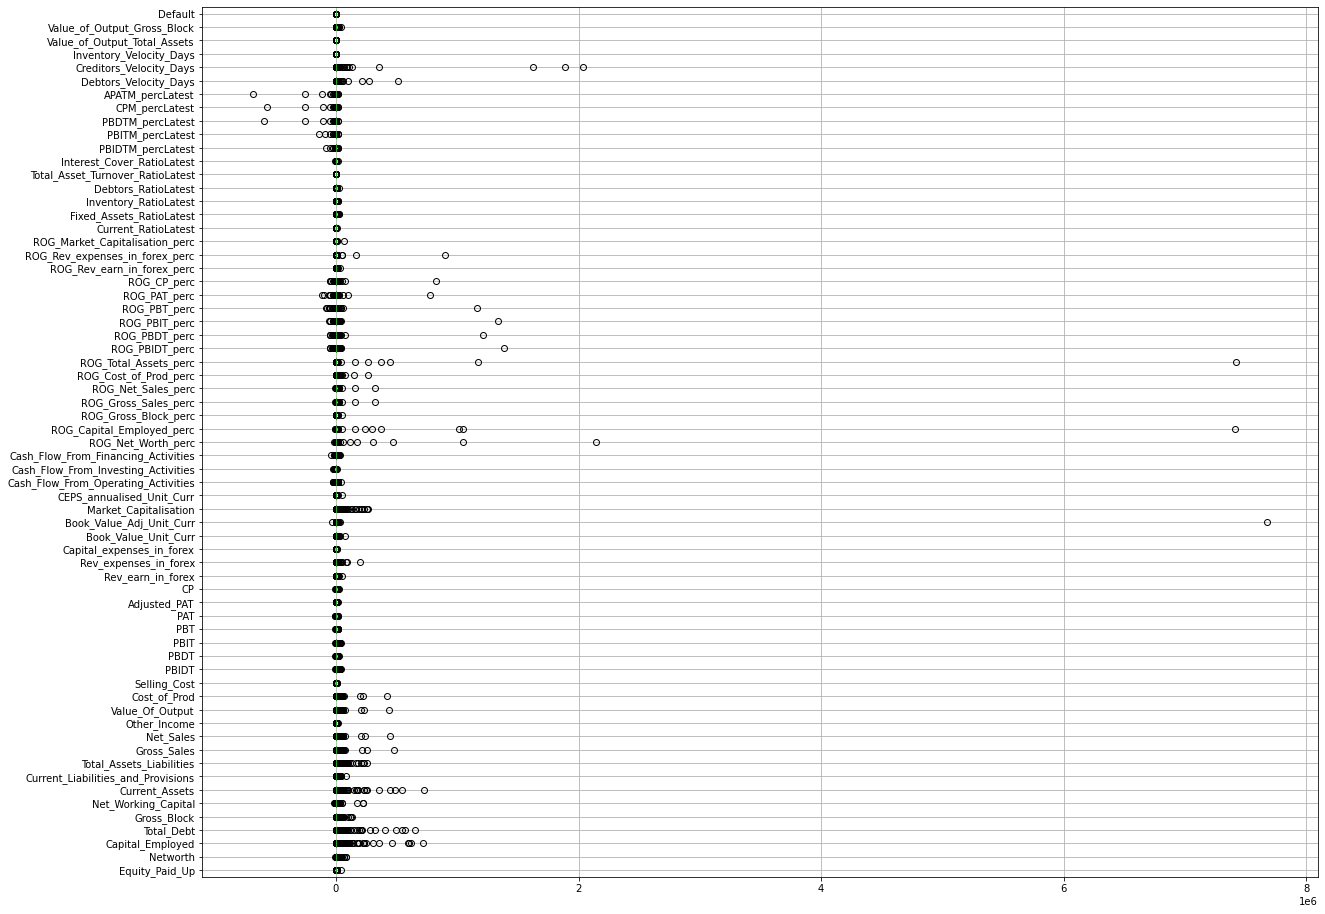

In [31]:
plt.figure(figsize=(20,16))
df.boxplot(vert=0)

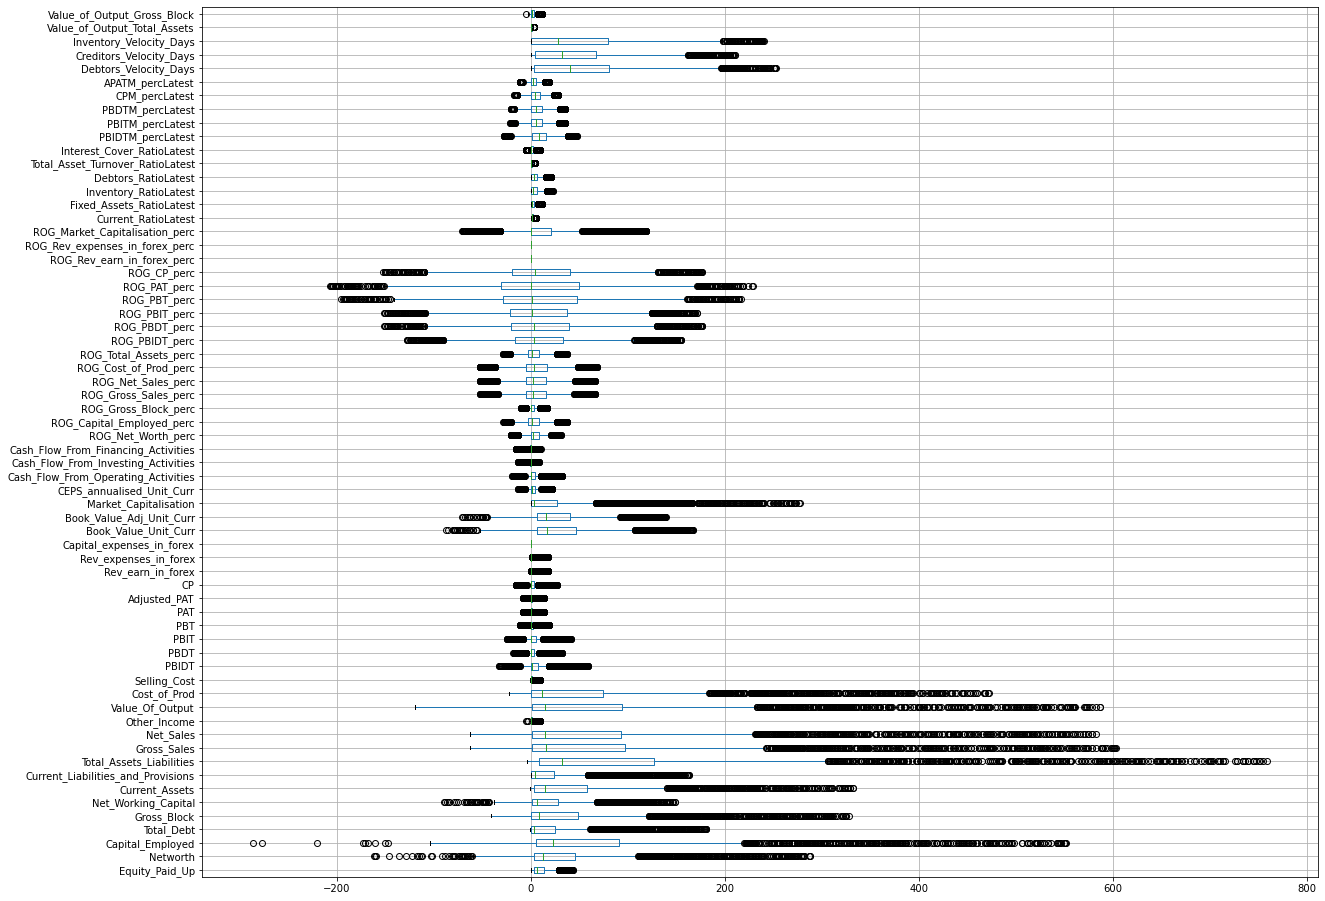

In [32]:
plt.figure(figsize=(20,16))
df_x.boxplot(vert=0)

In [33]:
df_x.isnull().sum().sort_values(ascending = False)/df_x.index.size *100

ROG_Rev_expenses_in_forex_perc         45.036252
ROG_Rev_earn_in_forex_perc             36.726157
Cash_Flow_From_Financing_Activities    28.025655
PAT                                    26.742889
Adjusted_PAT                           26.603458
PBT                                    26.240937
APATM_percLatest                       26.045733
Cash_Flow_From_Investing_Activities    24.428332
ROG_Gross_Block_perc                   23.145566
CP                                     22.755159
PBDT                                   22.727273
Cash_Flow_From_Operating_Activities    22.336866
ROG_Net_Worth_perc                     20.831009
Rev_earn_in_forex                      20.580033
Interest_Cover_RatioLatest             20.245399
CPM_percLatest                         20.105968
PBIT                                   20.078081
PBITM_percLatest                       20.022309
PBDTM_percLatest                       19.408812
Capital_expenses_in_forex              19.353040
Rev_expenses_in_fore

### Dropping the Columns with nan values since values were all outliers.
     

In [34]:
df_x = df_x.drop(['ROG_Rev_expenses_in_forex_perc','ROG_Rev_earn_in_forex_perc','Capital_expenses_in_forex'], axis=1)

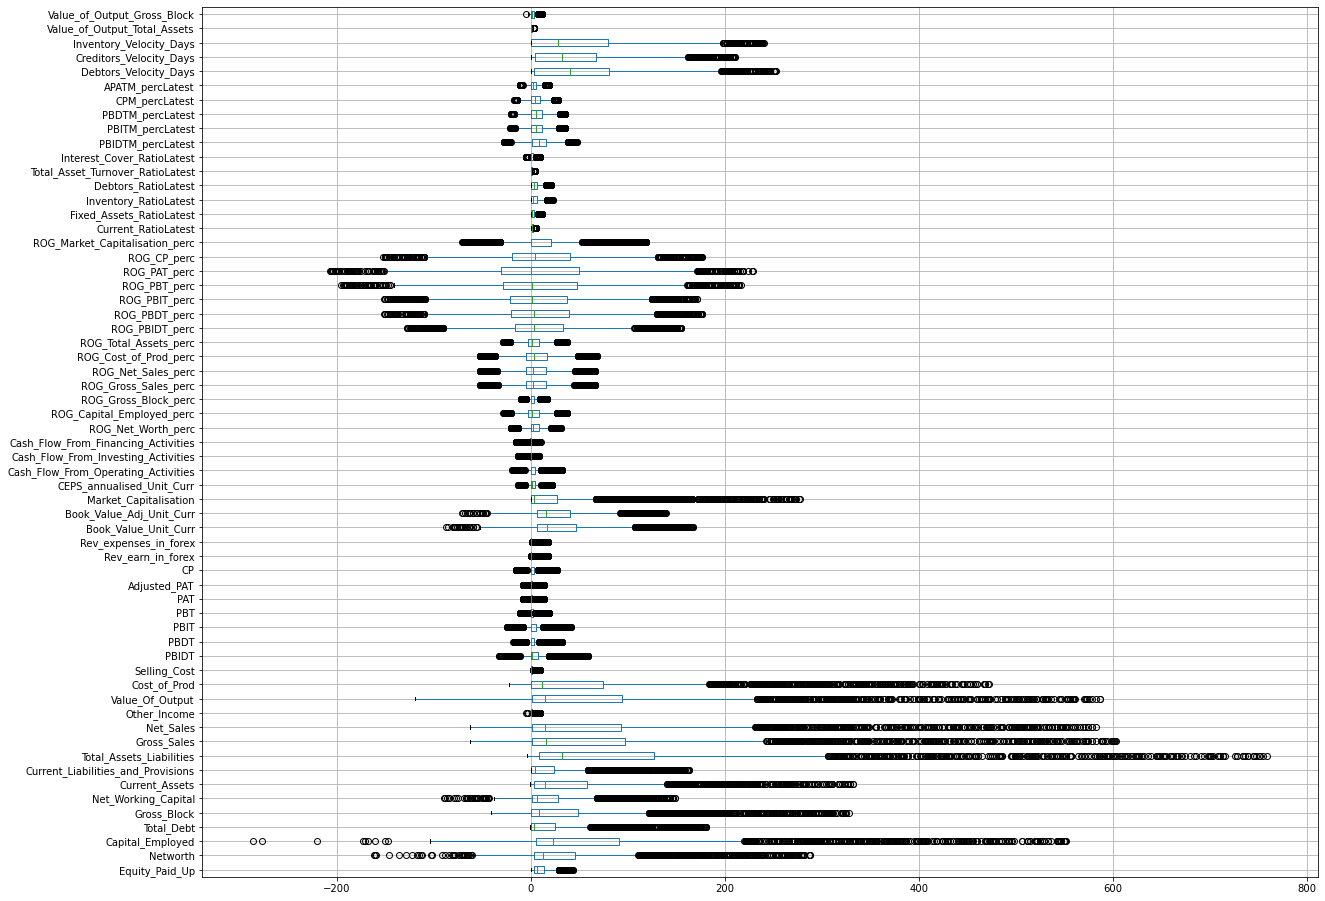

In [35]:
plt.figure(figsize=(20,16))
df_x.boxplot(vert=0)

In [36]:
temp= pd.concat([df_x,df_y], axis=1)

In [37]:
print ('Number of Rows and Columns',temp.shape,'\n')

print ('Number of rows with Missing Values', sum(temp.isnull().values.any(axis=1)),'\n')

print ('Number of missing values in the Column', temp.isnull().sum(),'\n')

print ('Total count of missing Values', temp.isnull().sum().sum())

print ( 'Proportion of Missing Values ',temp.isnull().sum().sum()/ temp.size )

Number of Rows and Columns (3586, 62) 

Number of rows with Missing Values 3403 

Number of missing values in the Column Equity_Paid_Up                          448
Networth                                650
Capital_Employed                        596
Total_Debt                              583
Gross_Block                             540
Net_Working_Capital                     625
Current_Assets                          577
Current_Liabilities_and_Provisions      581
Total_Assets_Liabilities                574
Gross_Sales                             554
Net_Sales                               556
Other_Income                            603
Value_Of_Output                         559
Cost_of_Prod                            560
Selling_Cost                            605
PBIDT                                   671
PBDT                                    815
PBIT                                    720
PBT                                     941
PAT                                     959

In [38]:
temp1=temp[temp.isnull().sum(axis=1) <1]

In [39]:
temp1.shape

(183, 62)

In [40]:
temp1['Default'].value_counts()

0    163
1     20
Name: Default, dtype: int64

In [41]:
94/17

5.529411764705882

1. not a very drastic change when we try to remove the out liers and the missing values in the proportion of the defaults to the total data.

2. Hence no point in considering to remove the outliers/ only work with the clean data provided data, we would rather have to most judiciously impute the missing values as well as treat the outliers.

In [42]:
def univariateanalysis (column,bins):
    print ('No of Missing Values in the column', df_x[column].isnull().sum())    
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    print (df_x[column].describe(), end='')
       
    plt.figure()
    print ('Description of '+ column)
    print ('--------------------------------------------------------------------------------------')
    sns.distplot(df_x[column],kde= True, color = 'r');
    plt.show()
    
    plt.figure()
    print ('Boxplot of '+ column)
    print ('--------------------------------------------------------------------------------------')
    ax= sns.boxplot(x= df_x[column])
    plt.show()

In [43]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
predictor = pd.DataFrame(scaler.fit_transform(df_x), columns= df_x.columns)

In [44]:
response=df_y.copy()

In [45]:
df_new = pd.concat([predictor,response], axis=1)

In [46]:
from sklearn.impute import KNNImputer

In [47]:
imputer = KNNImputer(n_neighbors=10)

In [48]:
df_imputed= pd.DataFrame(imputer.fit_transform(df_new), columns= df_new.columns)

In [49]:
df_imputed.isnull().sum()

Equity_Paid_Up                         0
Networth                               0
Capital_Employed                       0
Total_Debt                             0
Gross_Block                            0
Net_Working_Capital                    0
Current_Assets                         0
Current_Liabilities_and_Provisions     0
Total_Assets_Liabilities               0
Gross_Sales                            0
Net_Sales                              0
Other_Income                           0
Value_Of_Output                        0
Cost_of_Prod                           0
Selling_Cost                           0
PBIDT                                  0
PBDT                                   0
PBIT                                   0
PBT                                    0
PAT                                    0
Adjusted_PAT                           0
CP                                     0
Rev_earn_in_forex                      0
Rev_expenses_in_forex                  0
Book_Value_Unit_

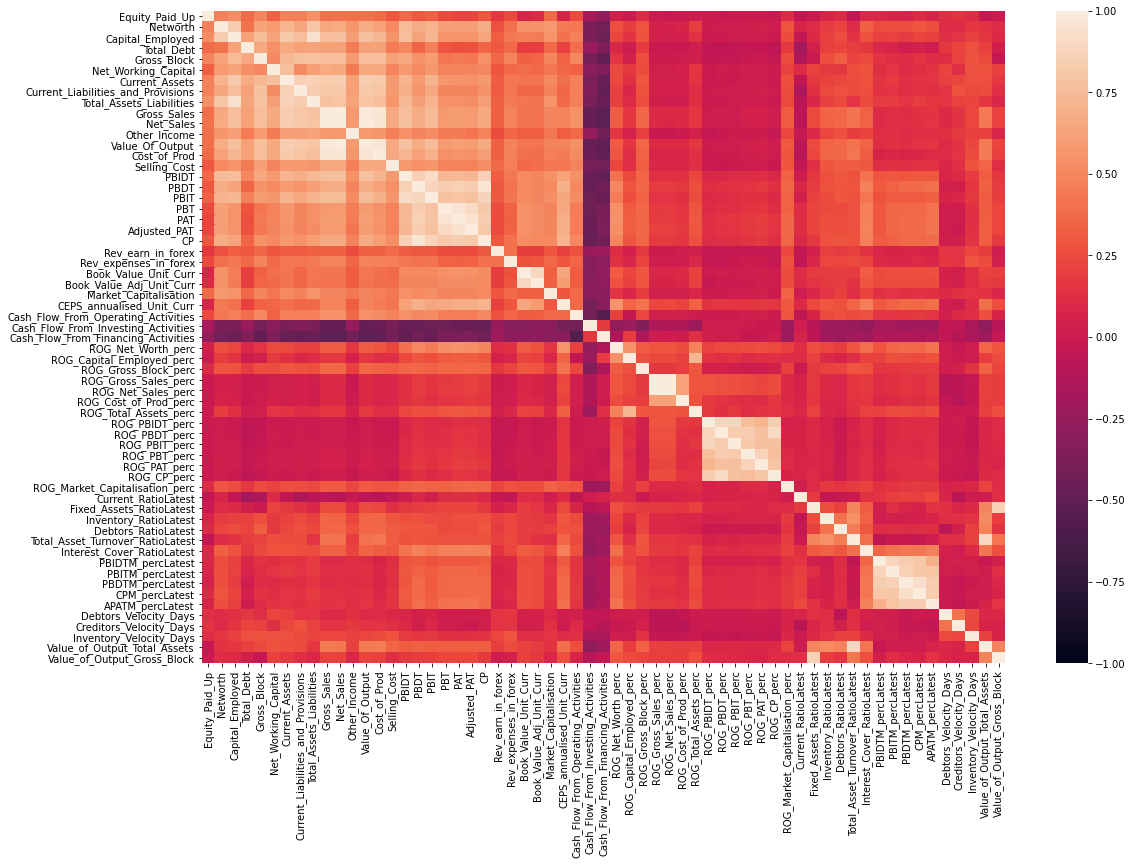

In [50]:
plt.figure(figsize= (18,12))
cor_mat= df_imputed.drop('Default', axis=1).corr()
sns.heatmap(cor_mat, vmin=-1,vmax=1, )

In [51]:
df_imputed.shape

(3586, 62)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [53]:
x = df_imputed.drop('Default', axis=1)
y= df_imputed['Default']

In [54]:
correlation = x.corr()

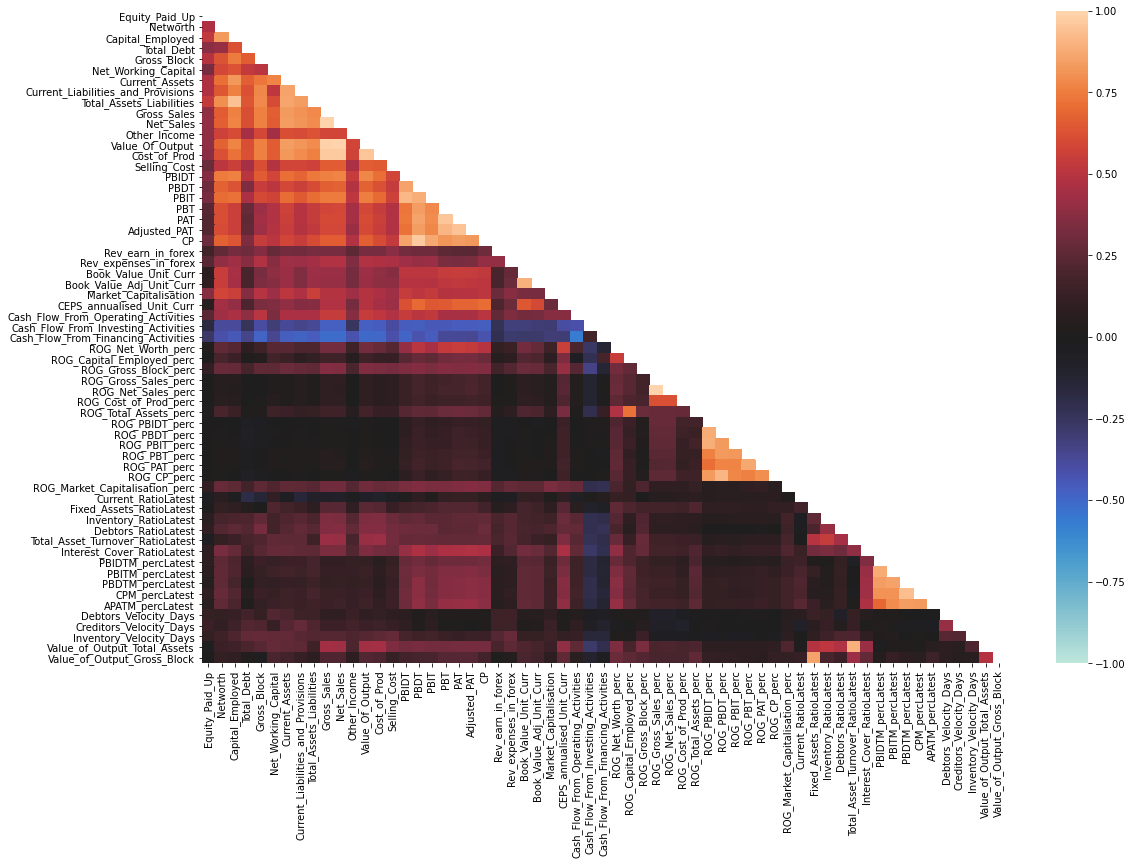

In [55]:
plt.figure(figsize= (18,12))

mask=np.triu(correlation)
sns.heatmap(correlation, vmin=-1,vmax=1, fmt='.1g', center=0, mask=mask)

In [56]:
LoGR= LogisticRegression()

In [57]:
x.shape

(3586, 61)

In [58]:
selector = RFE (estimator= LoGR, n_features_to_select= 20, step=1 )

In [59]:
x_train, x_test, y_train,y_test= train_test_split(x,y, test_size=.33, random_state=42)

In [60]:
selector= selector.fit(x_train,y_train)

In [61]:
selector.ranking_

array([32,  1,  1,  1,  1,  6,  5,  1,  1, 20, 31, 16,  1,  1, 17,  1,  1,
        1,  8, 15, 14,  1, 42, 11,  1,  1, 10, 40, 38,  9, 19,  1,  1, 36,
       35, 41,  4, 18, 37, 34, 27, 33, 26, 39, 30,  1,  7, 21, 29,  2,  1,
       25,  1, 23, 24,  1, 22, 13, 12,  3, 28])

In [62]:
ranked_col = pd.DataFrame({'Feature':x.columns, 'Rank':selector.ranking_ })
ranked_col[ranked_col['Rank']==1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
3,Total_Debt,1
4,Gross_Block,1
7,Current_Liabilities_and_Provisions,1
8,Total_Assets_Liabilities,1
12,Value_Of_Output,1
13,Cost_of_Prod,1
15,PBIDT,1
16,PBDT,1


In [63]:
pred_train= selector.predict(x_train)
pred_test = selector.predict(x_test)

In [64]:
print (confusion_matrix(y_train, pred_train))

[[2137   20]
 [  99  146]]


In [65]:
print(classification_report(y_train, pred_train))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      2157
         1.0       0.88      0.60      0.71       245

    accuracy                           0.95      2402
   macro avg       0.92      0.79      0.84      2402
weighted avg       0.95      0.95      0.95      2402



In [66]:
print(confusion_matrix(y_test, pred_test))

[[1026   16]
 [  45   97]]


In [67]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1042
         1.0       0.86      0.68      0.76       142

    accuracy                           0.95      1184
   macro avg       0.91      0.83      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [68]:
d_dict

,#,Field Name,Description,New Field Name
0,1,Co_Code,Company Code,Co_Code
1,2,Co_Name,Company Name,Co_Name
2,3,Networth Next Year,Value of a company as on 2016 - Next Year(diff...,Networth_Next_Year
3,4,Equity Paid Up,Amount that has been received by the company t...,Equity_Paid_Up
4,5,Networth,Value of a company as on 2015 - Current Year,Networth
5,6,Capital Employed,Total amount of capital used for the acquisiti...,Capital_Employed
6,7,Total Debt,The sum of money borrowed by the company and i...,Total_Debt
7,8,Gross Block,Total value of all of the assets that a compan...,Gross_Block
8,9,Net Working Capital,The difference between a company's current ass...,Net_Working_Capital
9,10,Current Assets,All the assets of a company that are expected ...,Curr_Assets


In [69]:
selector1 = RFE (estimator= LoGR, n_features_to_select= 30, step=1 )

In [70]:
selector1= selector1.fit(x_train,y_train)

In [71]:
selector1.ranking_

array([22,  1,  1,  1,  1,  1,  1,  1,  1, 10, 21,  6,  1,  1,  7,  1,  1,
        1,  1,  5,  4,  1, 32,  1,  1,  1,  1, 30, 28,  1,  9,  1,  1, 26,
       25, 31,  1,  8, 27, 24, 17, 23, 16, 29, 20,  1,  1, 11, 19,  1,  1,
       15,  1, 13, 14,  1, 12,  3,  2,  1, 18])

In [72]:
ranked_col1 = pd.DataFrame({'Feature':x.columns, 'Rank':selector1.ranking_ })
ranked_col1[ranked_col1['Rank']==1]

,Feature,Rank
1,Networth,1
2,Capital_Employed,1
3,Total_Debt,1
4,Gross_Block,1
5,Net_Working_Capital,1
6,Current_Assets,1
7,Current_Liabilities_and_Provisions,1
8,Total_Assets_Liabilities,1
12,Value_Of_Output,1
13,Cost_of_Prod,1


In [73]:
pred_train1= selector1.predict(x_train)
pred_test1 = selector1.predict(x_test)

In [74]:
print (confusion_matrix(y_train, pred_train1))

[[2139   18]
 [  88  157]]


In [75]:
print(classification_report(y_train, pred_train1))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98      2157
         1.0       0.90      0.64      0.75       245

    accuracy                           0.96      2402
   macro avg       0.93      0.82      0.86      2402
weighted avg       0.95      0.96      0.95      2402



In [76]:
print(confusion_matrix(y_test, pred_test1))

[[1024   18]
 [  44   98]]


In [77]:
print(classification_report(y_test, pred_test1))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      1042
         1.0       0.84      0.69      0.76       142

    accuracy                           0.95      1184
   macro avg       0.90      0.84      0.87      1184
weighted avg       0.95      0.95      0.95      1184



In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_curve,roc_auc_score

## 1.8 Build a Random Forest Model on Train Dataset. Also showcase your model building approach

   Using Random Forest so that it is easier to Hyper tune the model for better results.
   Decision trees are non-parametric supervised learning models that infer the value of a target variable by analyzing decision rules from the features of the dataset. Since the random forest consists of many decision trees, a random forest is used to produce what the most important features are to predict the target variable by analzying all the trees for which features use that tree to node. Also Random Forest is not deeply affected by Multicollinearity in the data so we can use all the predictors.

In [79]:
x_train.columns

Index(['Equity_Paid_Up', 'Networth', 'Capital_Employed', 'Total_Debt',
       'Gross_Block', 'Net_Working_Capital', 'Current_Assets',
       'Current_Liabilities_and_Provisions', 'Total_Assets_Liabilities',
       'Gross_Sales', 'Net_Sales', 'Other_Income', 'Value_Of_Output',
       'Cost_of_Prod', 'Selling_Cost', 'PBIDT', 'PBDT', 'PBIT', 'PBT', 'PAT',
       'Adjusted_PAT', 'CP', 'Rev_earn_in_forex', 'Rev_expenses_in_forex',
       'Book_Value_Unit_Curr', 'Book_Value_Adj_Unit_Curr',
       'Market_Capitalisation', 'CEPS_annualised_Unit_Curr',
       'Cash_Flow_From_Operating_Activities',
       'Cash_Flow_From_Investing_Activities',
       'Cash_Flow_From_Financing_Activities', 'ROG_Net_Worth_perc',
       'ROG_Capital_Employed_perc', 'ROG_Gross_Block_perc',
       'ROG_Gross_Sales_perc', 'ROG_Net_Sales_perc', 'ROG_Cost_of_Prod_perc',
       'ROG_Total_Assets_perc', 'ROG_PBIDT_perc', 'ROG_PBDT_perc',
       'ROG_PBIT_perc', 'ROG_PBT_perc', 'ROG_PAT_perc', 'ROG_CP_perc',
       'ROG_Ma

In [80]:
rfcl = RandomForestClassifier(n_estimators = 100,max_features=6,random_state=42)
rfcl = rfcl.fit(x_train, y_train)

In [81]:
rfcl

RandomForestClassifier(max_features=6, random_state=42)

In [82]:
ytrain_predict = rfcl.predict(x_train)
ytest_predict = rfcl.predict(x_test)

In [83]:
rfcl.score(x_train,y_train)

1.0

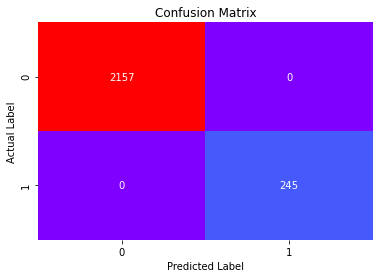

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2157
         1.0       1.00      1.00      1.00       245

    accuracy                           1.00      2402
   macro avg       1.00      1.00      1.00      2402
weighted avg       1.00      1.00      1.00      2402



In [84]:
confusion_matrix(y_train,ytrain_predict)
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_train,ytrain_predict))

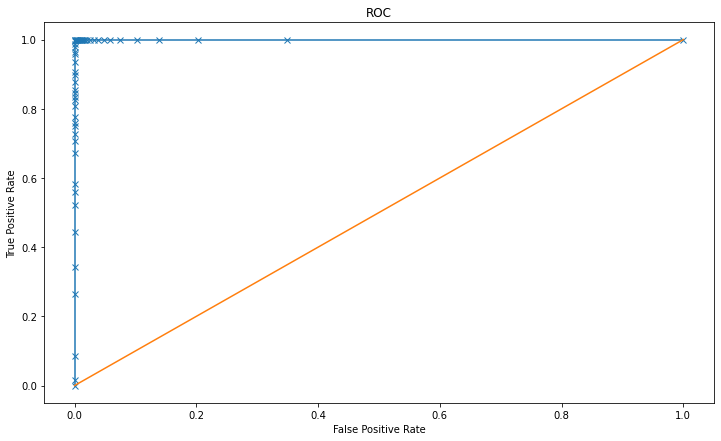

Area under Curve is 1.0


In [85]:
rf_fpr, rf_tpr,_=roc_curve(y_train,rfcl.predict_proba(x_train)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,rfcl.predict_proba(x_train)[:,1]))

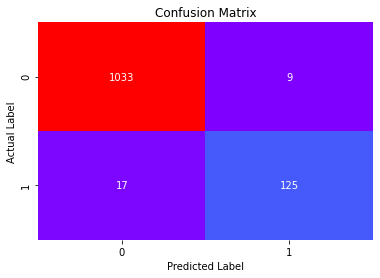

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      1042
         1.0       0.93      0.88      0.91       142

    accuracy                           0.98      1184
   macro avg       0.96      0.94      0.95      1184
weighted avg       0.98      0.98      0.98      1184



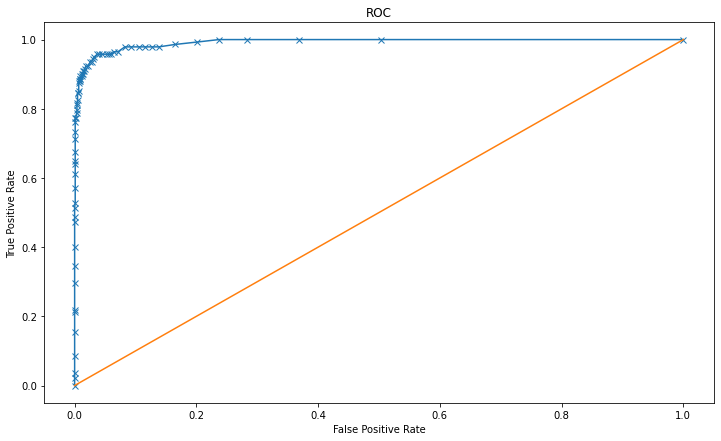

Area under Curve is 0.992261631207591


In [86]:
confusion_matrix(y_test,ytest_predict)
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True, fmt='d',cbar=False, cmap='rainbow')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test,ytest_predict))

rf_fpr, rf_tpr,_=roc_curve(y_test,rfcl.predict_proba(x_test)[:,1])
plt.figure(figsize=(12,7))
plt.plot(rf_fpr,rf_tpr, marker='x', label='Random Forest')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,rfcl.predict_proba(x_test)[:,1]))


Although the Model has performed reasonably better than logistic_Regression Model. We will try and hypertune the Model to get the optimum results.

We will use Gridsearch

In [87]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5,7,10],
    'max_features': [10,15,20],
    'min_samples_leaf': [5,10],
    'min_samples_split': [50,100],
    'n_estimators': [100,200,300]
}

rfcl = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator = rfcl, param_grid = param_grid, cv = 10)

In [88]:

# fdkashfa-s

# grid_search.fit(x_train,y_train)


In [95]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics

LDA = LinearDiscriminantAnalysis()
model=LDA.fit(x_train,y_train)

In [96]:
pred_class_train= model.predict(x_train)

In [97]:
pred_class_test = model.predict(x_test)

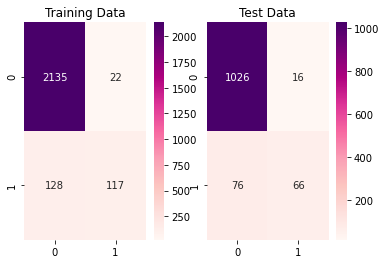

In [98]:
f,a =  plt.subplots(1,2,sharex=True,squeeze=False)

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',cmap='RdPu',ax=a[0][0]);
a[0][0].set_title('Training Data')

plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',cmap='RdPu',ax=a[0][1]);
a[0][1].set_title('Test Data');


In [99]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.94      0.99      0.97      2157
         1.0       0.84      0.48      0.61       245

    accuracy                           0.94      2402
   macro avg       0.89      0.73      0.79      2402
weighted avg       0.93      0.94      0.93      2402
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1042
         1.0       0.80      0.46      0.59       142

    accuracy                           0.92      1184
   macro avg       0.87      0.72      0.77      1184
weighted avg       0.92      0.92      0.91      1184
 



In [100]:
pred_prob_train = model.predict_proba(x_train)
pred_prob_test = model.predict_proba(x_test)

AUC for the Training Data: 0.950
AUC for the Test Data: 0.936


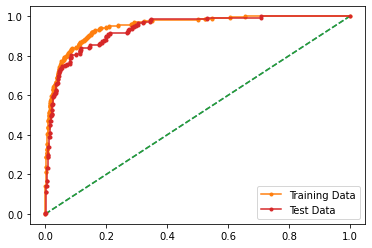

In [102]:
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')
plt.legend(loc='best')
plt.show()

In [104]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j 
    custom_cutoff_data=[]
    for i in range(0,len(y_train)):
        if np.array(pred_prob_train[:,1])[i] > custom_prob:
            a=1
        else:
            a=0
        custom_cutoff_data.append(a)#
    print(round(custom_prob, 1),round(metrics.precision_score(y_train,custom_cutoff_data),4))

0.1 0.5202
0.2 0.6477
0.3 0.7311
0.4 0.8
0.5 0.8417
0.6 0.8667
0.7 0.866
0.8 0.8736
0.9 0.9265


In [105]:
data_pred_custom_cutoff=[]
for i in range(0,len(pred_prob_test[:,1])):
    if np.array(pred_prob_test[:,1])[i]>0.1:
        a=1
    else:
        a=0
    data_pred_custom_cutoff.append(a)

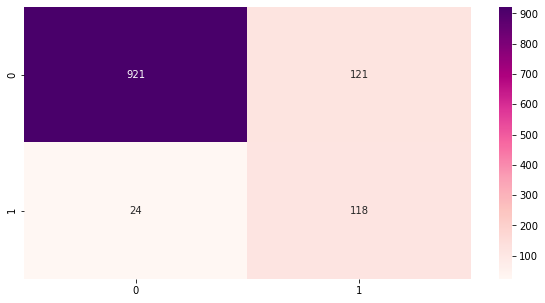

In [106]:
plt.figure(figsize=(10,5))
sns.heatmap((metrics.confusion_matrix(y_test,data_pred_custom_cutoff)),annot=True,fmt='.5g',cmap='RdPu');

In [108]:
print('Classification Report of the default cut-off test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n\n\n')
print('Classification Report of the custom cut-off test data:\n\n',metrics.classification_report(y_test,data_pred_custom_cutoff),'\n')

Classification Report of the default cut-off test data:

               precision    recall  f1-score   support

         0.0       0.93      0.98      0.96      1042
         1.0       0.80      0.46      0.59       142

    accuracy                           0.92      1184
   macro avg       0.87      0.72      0.77      1184
weighted avg       0.92      0.92      0.91      1184
 



Classification Report of the custom cut-off test data:

               precision    recall  f1-score   support

         0.0       0.97      0.88      0.93      1042
         1.0       0.49      0.83      0.62       142

    accuracy                           0.88      1184
   macro avg       0.73      0.86      0.77      1184
weighted avg       0.92      0.88      0.89      1184
 

